# Jane Street Market Prediction

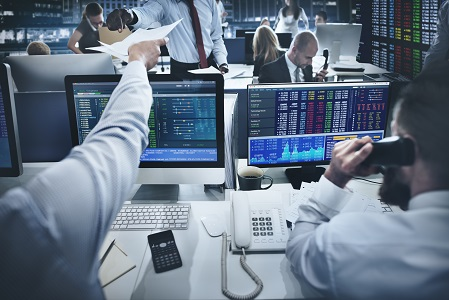

# Content
1. [Intoduction](#1)
2. [Evaluation](#2)
3. [Import Libraries](#3)
4. [Importing Data](#5)
5. [Explore the features of data](#5)
6. [Exploratory Data Analysis](#6)
    * [Features feature_{0...129}](#61) 
    * [Resps](#62) 
    * [Wieghts](#63)  

<a id="1"></a>
# 1-Introduction
In a perfectly efficient market, buyers and sellers would have all the agency and information needed to make rational trading decisions. As a result, products would always remain at their “fair values” and never be undervalued or overpriced. However, financial markets are not perfectly efficient in the real world.

Your challenge will be to use the historical data, mathematical tools, and technological tools at your disposal to create a model that gets as close to certainty as possible. You will be presented with a number of potential trading opportunities, which your model must choose whether to accept or reject.

<a id="2"></a>
# 2-Evaluation
This competition is evaluated on a utility score. Each row in the test set represents a trading opportunity for which you will be predicting an action value, 1 to make the trade and 0 to pass on it. Each trade j has an associated weight and resp, which represents a return.

For each date i, we define:
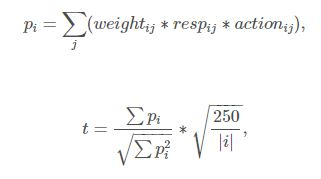
where |i| is the number of unique dates in the test set. The utility is then defined as:
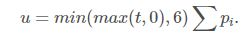

<a id="3"></a>
# 3-Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<a id="4"></a>
# 4-Importing Data

* I used datatable method to speed read train.csv, then convert to a pandas dataframe
* Datatable (heavily inspired by R's data.table) can read large datasets fairly quickly and is often faster than pandas. It is specifically meant for data processing of tabular datasets with emphasis on speed and support for large sized data.
* Documentation: https://datatable.readthedocs.io/en/latest/index.html

In [ ]:
!pip install ../input/python-datatable/datatable-0.11.0-cp37-cp37m-manylinux2010_x86_64.whl
import datatable as dt
train = dt.fread("../input/jane-street-market-prediction/train.csv").to_pandas() #, max_nrows=30000000
features = pd.read_csv("../input/jane-street-market-prediction/features.csv")
example_test = pd.read_csv("../input/jane-street-market-prediction/example_test.csv", nrows=10**3 )

<a id="5"></a>
# 5-Explore the features of data

In [ ]:
print(f'train shape:{train.shape}')
print(f'features shape:{features.shape}')


## train.csv

In [ ]:
train.sample(3)

## fearures.csv

In [ ]:
features.sample(3)

## example_test.csv

In [ ]:

example_test.sample(3)

## Train Describe

In [ ]:
train.describe()

## The columns containing null values in train.csv

In [ ]:
print("No. of columns containing null values")
print(len(train.columns[train.isna().any()]))

print("No. of columns not containing null values")
print(len(train.columns[train.notna().all()]))

print("the columns containing null values")
print(train.columns[train.isna().any()])


## The columns containing null values in features.csv

In [ ]:

print("No. of columns containing null values")
print(len(features.columns[features.isna().any()]))

print("No. of columns not containing null values")
print(len(features.columns[features.notna().all()]))


## Discovering unique values in train.csv

In [ ]:
#discovering unique values in data
cols = train.columns
for c in cols: 
    print(f' The unique values in {c} :{train[c].nunique()}')

<a id="6"></a>
# 6-Exploratory Data Analysis

## Correlation coefficients
Correlation coefficients are used in statistics to measure how strong a relationship is between two variables

In [ ]:
plt.figure(figsize=(18,18))
data_corr=train.corr()
sns.heatmap(data_corr, cmap = 'coolwarm')

In [ ]:
data_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [ ]:

#data_corr[np.absolute(data_corr['feature_1']) > 0.25]['feature_1']

<a id="61"></a>
# Features feature_{0...129}


## Distribution of features
There are  500 days of data in train.csv . Let us take a look at date=0 (the first day)

In [ ]:
date = 0
n_features = 130

cols = [f'feature_{i}' for i in range(1, n_features)]
hist = px.histogram(
    train[train["date"] == date], 
    x=cols, 
    animation_frame='variable', 
    range_y=[0, 700], 
    range_x=[-8, 8]
)

hist.show()

## Spread of features
There are  500 days of data in train.csv . Let us take a look at date=0 (the first day)

In [ ]:
date = 0
n_features = 130
cols = [f'feature_{i}' for i in range(1, n_features)]
hist = px.scatter(
    train[train["date"] == date], 
    x=cols, 
    animation_frame='variable', 
    range_y=[-500, 6500], 
    range_x=[-10, 10]
)
hist.layout.showlegend = False
hist.show()

## Discover outlier values in features
I just have selected the first 10 features

In [ ]:
def plot_outlier_graph_set(df):
    n_features = 10
    feature_cols = [f'feature_{i}' for i in range(1, n_features)]
    for f in feature_cols:
        fig, axs = plt.subplots(1, 4, figsize=(16, 5))
        sns.boxplot(y=f, data=df, ax=axs[0])
        sns.boxenplot(y=f, data=df, ax=axs[1])
        sns.violinplot(y=f, data=df, ax=axs[2]) 
        sns.stripplot(y=f, data=df, size=4, color=".3", linewidth=0, ax=axs[3])
        fig.suptitle(f, fontsize=15, y=1.1)
        axs[0].set_title('Box Plot')
        axs[1].set_title('Boxen Plot')
        axs[2].set_title('Violin Plot')
        axs[3].set_title('Strip Plot')
        plt.tight_layout()
        plt.show()
        
plot_outlier_graph_set(train)

## Linear,Noisy,Hybrid and Negative features
Thanks Carl McBride Ellis [here](https://www.kaggle.com/carlmcbrideellis/jane-street-eda-of-day-0-and-feature-importance)

## Linear features
Features 1, 7, 9, 11, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 41, 46, 47, 48, 49, 50, 51, 53, 54, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95 (strong change in gradient), 96, 97, 98, 99, 100, 101, 102 (strong change in gradient), 103, 104, 105, 106, 107 (strong change in gradient), 108, 110, 111, 113, 114, 115, 116, 117, 118, 119 (strong change in gradient), 120, 122, and 124. all seem to look somewhat like this:

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
feature_1 = pd.Series(train['feature_1']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_ylabel ("feature_1 (cumulative)", fontsize=18);
feature_1.plot(lw=2);

## Noisy features
Features 3, 4, 5, 6, 8, 12, 37, 38, 72, 74, 78, 80, 83: all seem to look somewhat like this:

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
feature_3 = pd.Series(train['feature_3']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_ylabel ("feature_3 (cumulative)", fontsize=18);
feature_3.plot(lw=2);

## Hybrid features
That start off noisy, but then go linear; 55, 56, 57, 58, 59:

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
feature_55 = pd.Series(train['feature_55']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_ylabel ("feature_55 (cumulative)", fontsize=18);
feature_55.plot(lw=2);

## Negative features
Features 73, 75, 76, 77 (noisy), 79, 81(noisy), 82:

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
feature_77 = pd.Series(train['feature_77']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_ylabel ("feature_77  (cumulative)", fontsize=18);
feature_77.plot(lw=2);

<a id="62"></a>
# Resps

## Distribution of Resps
There are 500 days of data in train.csv . Let us take a look at the first 30th days

In [ ]:
date_start = 0
date_end = 30

fig = px.histogram(
    train[(train.date >= date_start) & (train.date <= date_end)], 
    x=['resp_1', 'resp_2', 'resp_3', 'resp_4','resp'], 
    facet_col='variable', animation_frame='date')
fig.show()

## Spread of Resps
There are  500 days of data in train.csv . Let us take a look at date=0 (the first day)

In [ ]:
date = 0
hist = px.scatter(
    train[train["date"] == date], 
    x=['resp_1', 'resp_2', 'resp_3', 'resp_4','resp'], 
    animation_frame='variable', 
    range_y=[-500, 6500], 
    range_x=[-0.3, 0.3]
)
hist.layout.showlegend = False
hist.show()

## Cumulative return of Resps

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
balance= pd.Series(train['resp']).cumsum()
resp_1= pd.Series(train['resp_1']).cumsum()
resp_2= pd.Series(train['resp_2']).cumsum()
resp_3= pd.Series(train['resp_3']).cumsum()
resp_4= pd.Series(train['resp_4']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_title ("Cumulative return of Resps and time (500 days)", fontsize=18)
balance.plot(lw=2)
resp_1.plot(lw=2)
resp_2.plot(lw=2)
resp_3.plot(lw=2)
resp_4.plot(lw=2)
plt.legend(loc="upper left")

## Discover outlier values in Resps

In [ ]:
def plot_outlier_graph_set1(df):
    feature_cols = ["resp", "resp_1", "resp_2", "resp_3", "resp_4"]
    for f in feature_cols:
        fig, axs = plt.subplots(1, 4, figsize=(16, 5))
        sns.boxplot(y=f, data=df, ax=axs[0])
        sns.boxenplot(y=f, data=df, ax=axs[1])
        sns.violinplot(y=f, data=df, ax=axs[2]) 
        sns.stripplot(y=f, data=df, size=4, color=".3", linewidth=0, ax=axs[3])
        fig.suptitle(f, fontsize=15, y=1.1)
        axs[0].set_title('Box Plot')
        axs[1].set_title('Boxen Plot')
        axs[2].set_title('Violin Plot')
        axs[3].set_title('Strip Plot')
        plt.tight_layout()
        plt.show()
        
plot_outlier_graph_set1(train)

<a id="63"></a>
# Weight

## Distribution of Weight
There are 500 days of data in train.csv . Let us take a look at the first 30th days

In [ ]:
date_start = 0
date_end = 30

fig = px.histogram(
    train[(train.date >= date_start) & (train.date <= date_end)], 
    x=['weight'], 
    facet_col='variable', animation_frame='date')
fig.show()

## Cumulative return of weight

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
weight= pd.Series(train['weight']).cumsum()

ax.set_xlabel ("Trade", fontsize=18)
ax.set_title ("Cumulative return of weight and time  (500 days)", fontsize=18)
weight.plot(lw=2)

plt.legend(loc="upper left")

## Discover outlier values in Weight

In [ ]:
def plot_outlier_graph_set2(df):
    feature_cols = ["weight"]
    for f in feature_cols:
        fig, axs = plt.subplots(1, 4, figsize=(16, 5))
        sns.boxplot(y=f, data=df, ax=axs[0])
        sns.boxenplot(y=f, data=df, ax=axs[1])
        sns.violinplot(y=f, data=df, ax=axs[2]) 
        sns.stripplot(y=f, data=df, size=4, color=".3", linewidth=0, ax=axs[3])
        fig.suptitle(f, fontsize=15, y=1.1)
        axs[0].set_title('Box Plot')
        axs[1].set_title('Boxen Plot')
        axs[2].set_title('Violin Plot')
        axs[3].set_title('Strip Plot')
        plt.tight_layout()
        plt.show()
        
plot_outlier_graph_set2(train)

# PLEASE UPVOTE if you like this kernel.

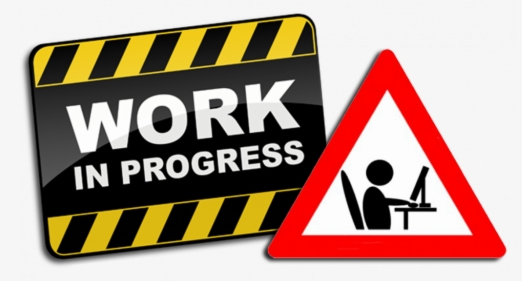

## References
* https://www.kaggle.com/carlmcbrideellis/jane-street-eda-of-day-0-and-feature-importance
* https://www.kaggle.com/blurredmachine/jane-street-market-eda-viz-prediction
* https://www.kaggle.com/xhlulu/jane-street-animated-and-interactive-eda